# Coarse-graining pipeline

## 1. Prepare the data

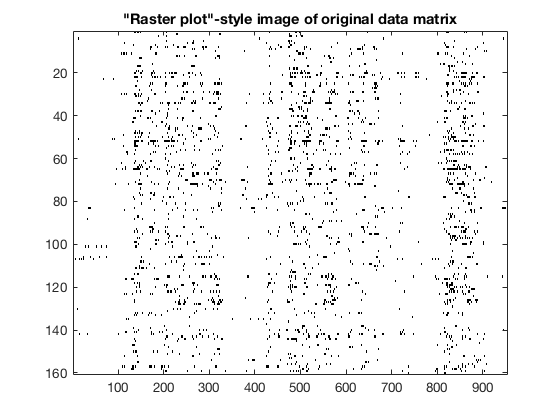

In [1]:
%CGpipeline
%close all; clear; clc; CGpipeline

 
%Load neural data
load bint_fishmovie32_100
data=reshape(bint(297,:,:),[160,953]);
data=data*2-1;
mean(sum(data>0,2)/953);
mean(mean(data,2));


%CHOOSE THE NUMBER OF CG ITERATIONS !
%Pre-allocate space for saving each GC step
CGevents=70;            %Number of iterations
C{1,CGevents+1}=[];
C{1}=data;
Rec=data;
%R{CGevents}=[];


%Break down each neuron's trajectory as member in a cell array
for g=1:size(C{1},1)
c{g}=C{1}(g,:);
end
D{1}=c;
%masterlist{1}=c;



%"Raster plot"-style image of original data matrix
figure,imagesc(C{1})
colormap(flipud(gray))
title('"Raster plot"-style image of original data matrix')


## 2. Perform the CG using analytical solution, "CGevents" (as defined above) times

In [2]:

%Main loop

for k=1:CGevents
k

 
%Find most highly correlated pair
[mosthigh,hival]=find_most_highly(data);
MostHi(k,:)=mosthigh;

%Calculate stats for most highly correlated pair
v1=data(mosthigh(1),:); v2=data(mosthigh(2),:);
means=[mean(data(mosthigh(1),:)) mean(data(mosthigh(2),:))];
pairwise=mean(data(mosthigh(1),:).*data(mosthigh(2),:));
covarnce=pairwise-mean(data(mosthigh(1),:))*mean(data(mosthigh(2),:));

%Break the loop if <s_1*s_2> is negative or zero
if pairwise<=0
    fprintf('Non-positive pairwise correlation')
    k
    break   %Violates assumptions; stop here
end


%Analytical solution equations
tanhJ0sqd=means(1)*means(2)/pairwise;
tanhJ1sqd=means(1)*pairwise/means(2);
tanhJ2sqd=means(2)*pairwise/means(1);

 
%Break the loop if any of above is >1
if sum([tanhJ0sqd tanhJ1sqd tanhJ2sqd]>1)
    fprintf('Error: Component > 1')
    k
    break
end

 %Choose values of couplings (as interdependent, from each other)
J0=atanh(-tanhJ0sqd^.5);       %choose minus root as default
%J1=atanh(tanhJ1sqd^.5);
J1=atanh(means(1)/tanh(J0));
%J2=atanh(tanhJ2sqd^.5);
J2=atanh(pairwise/tanh(J1));
%mean(v1)^2+mean(v2)^2

%Correlation for current pair -- check
corry=(pairwise-mean(v1)*mean(v2))/sqrt(var(v1)*var(v2));
[J0 J1 J2]

%In case any of above didn't catch it...
if sum((imag([J0 J1 J2]))>0)
    fprintf('Imaginary couplings')
    k
    break

end

%Run script to propagate one step forward and backward
%Calculate sigma (hidden) from v1,v2; then in reverse
logistic_through
Meansig(k)=meansig;
data(mosthigh,:)=[];
data=[data; samples];
newsigs{k}=samples;
%masterlist{k+1}=[masterlist{k}(setdiff(1:length(masterlist{k}),MostHi(:))) newsigs];


%Not in use currently; reconstruction of v1, v2 statistics
[insertLoHi,indexes]=sort(mosthigh);
    if (sum(insertLoHi)~=1) & (sum(insertLoHi)~=size(data,1))
        rec=[data(1:insertLoHi(1)-1,:); vis(indexes(1),:); data(insertLoHi(1):insertLoHi(2)-1,:); vis(indexes(2),:); data(insertLoHi(2):end-1,:)];
    else
        fprintf('Error in reconstruction')
        k
    end

 

%Save couplings each iteration
couplings(k,:)=[J0 J1 J2];
covthrutime(k)=covarnce;

 

%Compare probability distribution ((1,1),(1,-1),(-1,1), & (-1,-1))
%s_1 and s_2 with reconstruction for a given CG iteration
%fprintf('Individual reconstructions: sample stats')
JPD_compar(:,:,k)=[[sum((v1+v2)==2) sum((v1==1) & (v2==-1)) sum((v1==-1) & (v2==1)) sum((v1+v2)==-2)]/953; [sum((vis(1,:)+vis(2,:)==2)) sum((vis(1,:)==1) & (vis(2,:)==-1)) sum((vis(1,:)==-1) & (vis(2,:)==1)) sum((vis(1,:)+vis(2,:))==-2)]/953];
%figure
%bar(JPD_compar(:,:,k)')
%abs(JPD_compar(1,:,k)-JPD_compar(2,:,k))
%errorbar(mean(JPD_compar(:,:,k),3),mean(abs(JPD_compar(1,:,:)-JPD_compar(2,:,:)),3))

%errorbar(mean(JPD_compar(1,:,k),3),mean(abs(JPD_compar(1,:,:)-JPD_compar(2,:,:)),3))
%hold on
%errorbar(mean(JPD_compar(2,:,k),3),mean(abs(JPD_compar(1,:,:)-JPD_compar(2,:,:)),3))
 

%figure
%bar(1:4,[sum((v1+v2)==2) sum((v1==1) & (v2==-1)) sum((v1==-1) & (v2==1)) sum((v1+v2)==-2)]/953,0.5,'FaceColor',[0.2 0.2 0.5]); hold on
%bar(1:4,[sum((vis(1,:)+vis(2,:)==2)) sum((vis(1,:)==1) & (vis(2,:)==-1)) sum((vis(1,:)==-1) & (vis(2,:)==1)) sum((vis(1,:)+vis(2,:))==-2)]/953,.25,'FaceColor',[0 0.7 0.7])



%Save the coarse-grained data matrix

    C{1,k+1}=data;
    
    %size(D{k})
    included{k}=setdiff(1:length(D{k}),MostHi(k,:));
    D{k+1}=[D{k}(included{k}) newsigs{k}];  %add new neurons to array
    %setdiff(1:length(D{k}),MostHi(k,:))
    

end

    


k =

     1


ans =

   -1.1888    1.7305    1.0713


k =

     2


ans =

   -1.4444    1.1494    1.1494


k =

     3


ans =

   -1.6337    1.3855    1.4620


k =

     4


ans =

   -1.6960    1.7143    1.6293


k =

     5


ans =

   -1.6574    2.4474    0.9949


k =

     6


ans =

   -1.7324    1.4023    1.7529


k =

     7


ans =

   -1.7540    1.6285    1.5836


k =

     8


ans =

   -1.7412    1.2374    2.0171


k =

     9


ans =

   -1.7246    1.8724    1.1489


k =

    10


ans =

   -1.8130    1.9127    1.5590


k =

    11


ans =

   -1.8390    1.7509    1.5309


k =

    12


ans =

   -1.8616    1.2853    1.5067


k =

    13


ans =

   -1.9434    1.7892    1.4268


k =

    14


ans =

   -2.0241    2.1365    1.6205


k =

    15


ans =

   -2.0161    1.4908    1.5806


k =

    16


ans =

   -2.0607    2.0254    1.5498


k =

    17


ans =

   -2.0666    1.7148    1.7517


k =

    18


ans =

   -2.1323    2.2206    1.7970


k =

    19


ans =

   -2.

## 3. Reconstruct the data by using analytical solutions backwards for each (saved) step

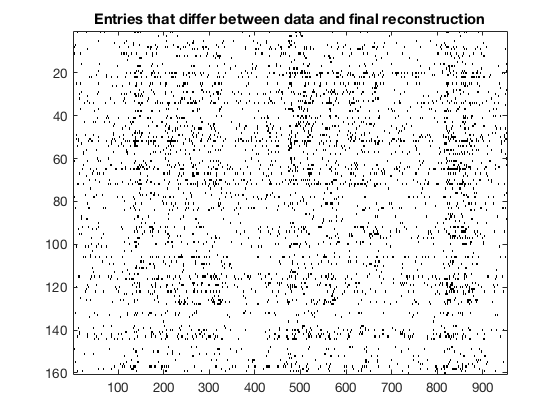

In [3]:


   %Building the Reconstructions for each iteration backwards
R=D;
    for k=CGevents:-1:1
        R{k}(included{k})=R{k+1}(1:end-1);
        activ=[cell2mat(R{k+1}(end)'); cell2mat(R{k+1}(end)')].*couplings(k,2:3)';
        recons=(exp((activ))./(2.*cosh(activ))>rand(2,num_samps))*2-1;
        R{k}(MostHi(k,:))={recons(1,:),recons(2,:)};
        %imagesc(cell2mat(R{k}')==cell2mat(D{k}'))
        %find(~ismember(cell2mat(D{1}'),cell2mat(R{1}'),'rows'))
    end
    
    
        figure
        imagesc(cell2mat(R{1}')==C{1})
        title('Entries that differ between data and final reconstruction')
        colormap('gray')
    


## 4. Compute the covariance matrixes for comparison:

Are the most highly correlated neurons the same in all?
(Haven't explicitly calculated "receptive fields" yet.)


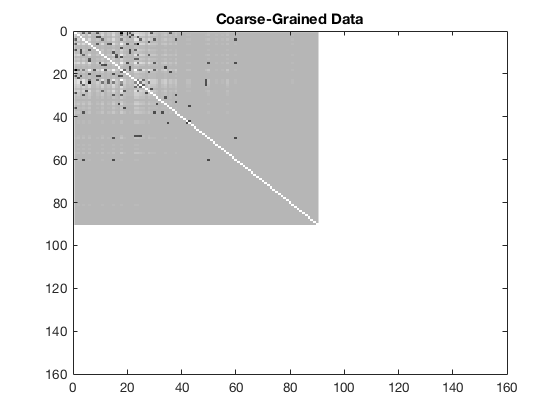

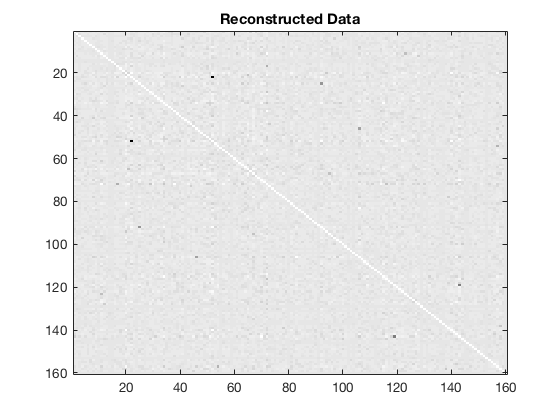

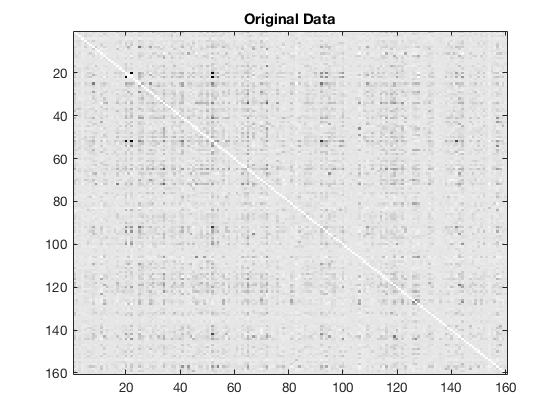

In [4]:
%Compute the covariance matrixes:
        
    %[covC_raw,covC]=cov_matrix(C{1});
    [covDat_raw,covDat]=cov_matrix(cell2mat(D{1}'));
    [covRec_raw,covRec]=cov_matrix(cell2mat(R{1}'));
    [covCG_raw,covCG]=cov_matrix(cell2mat(D{end}'));
    
    %figure,imagesc(covC); title('Original Data Matrix')
    figure,imagesc(covDat); title('Original Data'); colormap(flipud(gray))
    figure,imagesc(covRec); title('Reconstructed Data'); colormap(flipud(gray))
    figure,imagesc(covCG); title('Coarse-Grained Data'); colormap(flipud(gray))
        xlim([0 160]); ylim([0 160]);

## 5. Sanity check: Which are the most correlated pairs?

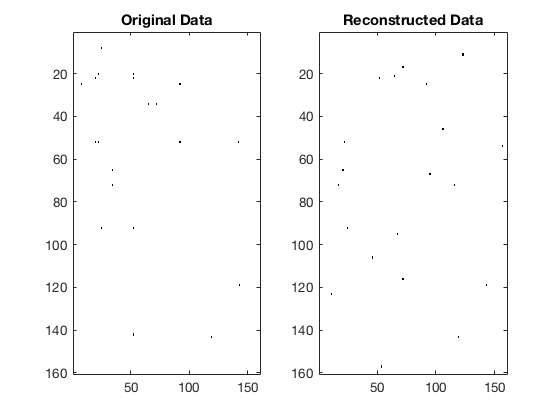

In [5]:
%Find the locations of the most highly correlated in original data, coarse-grained, and final reconstructions, in order.
    
    howmanytop=10;  %Top __ covariance entries (in data/recons)
    
    [covDat_unique indD]=sort(unique(covDat(~isnan(covDat))),'descend');
    covDat_top=covDat_unique(1:howmanytop);
    [rD,cD]=find(ismember(triu(covDat),covDat_top(1:howmanytop)));
    
    [covRec_unique]=sort(unique(covRec(~isnan(covRec))),'descend');
    covRec_top=covRec_unique(1:howmanytop);
    [rR,cR]=find(ismember(triu(covRec),covRec_unique(1:howmanytop)));

    
    %Lists of top entries and locations
    
    for topindsD=1:howmanytop
        topsD(topindsD)=covDat(rD(topindsD),cD(topindsD));
    end
        [topsD,indsD]=sort(topsD','descend');
        rD=rD(indsD); cD=cD(indsD);
    
    for topindsR=1:howmanytop
        topsR(topindsR)=covDat(rR(topindsR),cR(topindsR));
    end
        [topsR,indsR]=sort(topsR','descend');
        rR=rR(indsR); cR=cR(indsR);
    
    
         
    %Side-by-side plot of top cov's for original data vs. recons
    figure
    subplot(1,2,1)
    imagesc(covDat>=covDat_top(end)); colormap(flipud(gray));
    title('Original Data')
    subplot(1,2,2)
    imagesc(covRec>=covRec_top(end)); colormap(flipud(gray));
    title('Reconstructed Data')
    %Should add covCG!!!
    
    
    %figure,imagesc(covRec>=covRec_top(end) == covDat>=covDat_top(end)); colormap(flipud(gray));

## 6. Bar graphs showing average reconstruction error for full JPD: (1,1) (1,-1) (-1,1) (-1,-1)

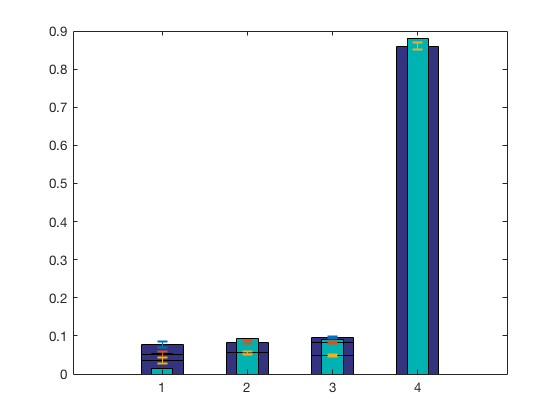

In [6]:
k=1;
%Joint probability distributions w/ average subtractive errors
bar(mean(JPD_compar(1,:,k),3),0.5,'FaceColor',[0.2 0.2 0.5]); hold on; bar(mean(JPD_compar(2,:,k),3),.25,'FaceColor',[0 0.7 0.7])
errorbar(mean(JPD_compar(1,:,k),3),mean(abs(JPD_compar(1,:,:)-JPD_compar(2,:,:)),3),'LineStyle','none','MarkerSize', 20)


k=2;
%Joint probability distributions w/ average subtractive errors
bar(mean(JPD_compar(1,:,k),3),0.5,'FaceColor',[0.2 0.2 0.5]); hold on; bar(mean(JPD_compar(2,:,k),3),.25,'FaceColor',[0 0.7 0.7])
errorbar(mean(JPD_compar(1,:,k),3),mean(abs(JPD_compar(1,:,:)-JPD_compar(2,:,:)),3),'LineStyle','none','MarkerSize', 20)


k=3;
%Joint probability distributions w/ average subtractive errors
bar(mean(JPD_compar(1,:,k),3),0.5,'FaceColor',[0.2 0.2 0.5]); hold on; bar(mean(JPD_compar(2,:,k),3),.25,'FaceColor',[0 0.7 0.7])
errorbar(mean(JPD_compar(1,:,k),3),mean(abs(JPD_compar(1,:,:)-JPD_compar(2,:,:)),3),'LineStyle','none','MarkerSize', 20)


## 7a. Sanity check: Are reconstructions cumulative? Which elements replaced?

### The actual "data" matrices containing neuron trajectories:

the MATLAB function has been cancelled


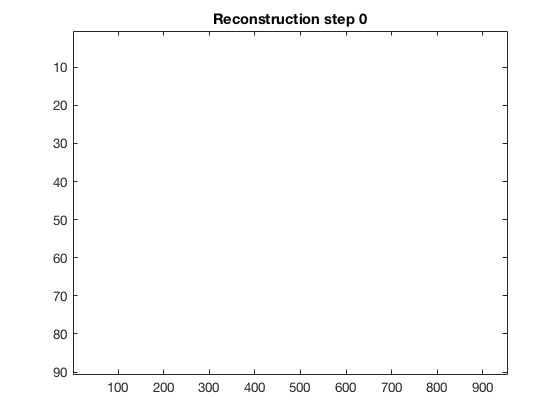

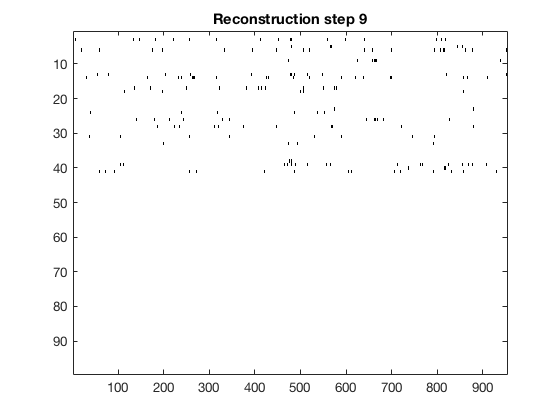

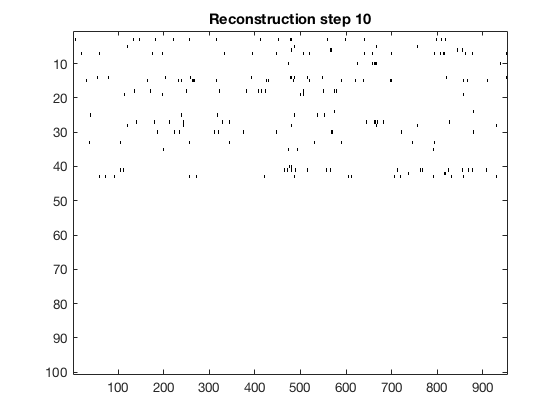

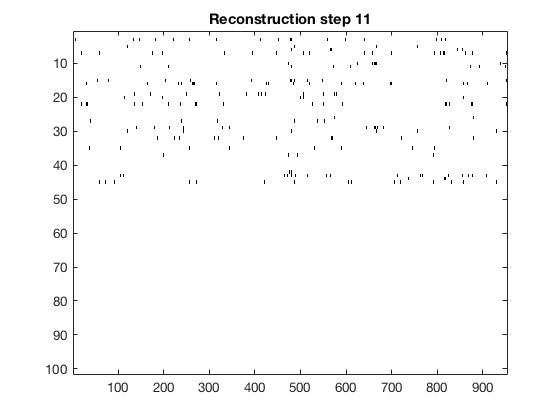

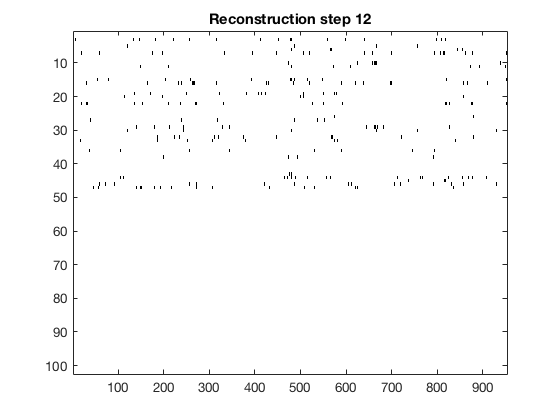

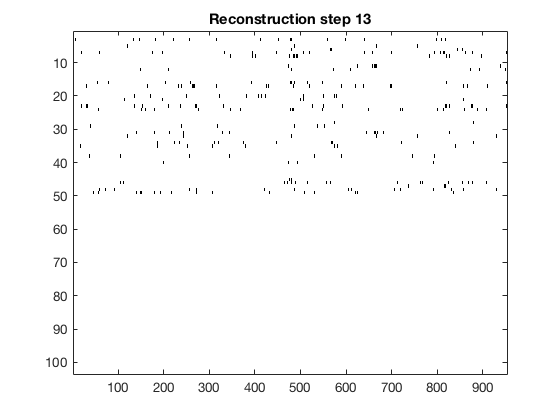

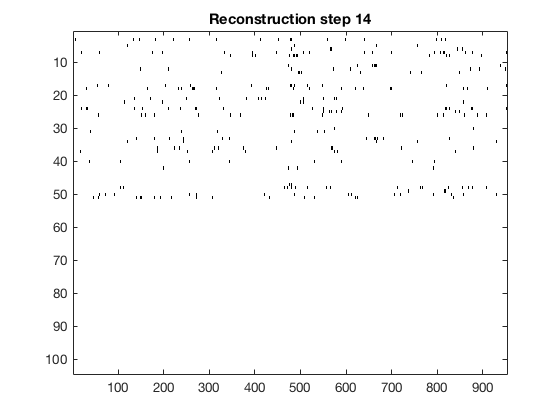

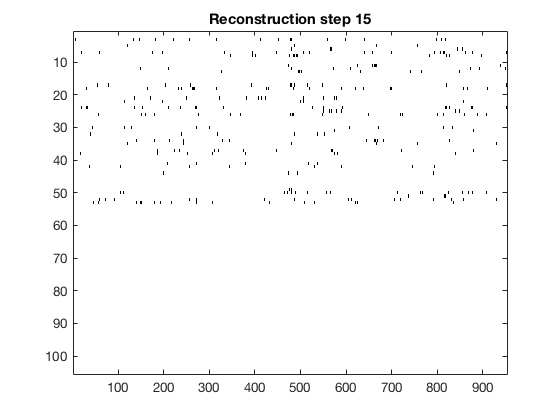

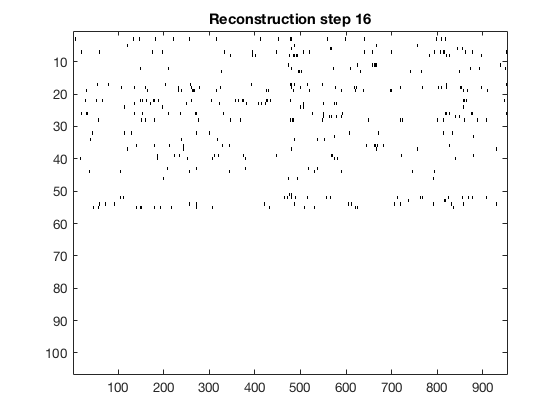

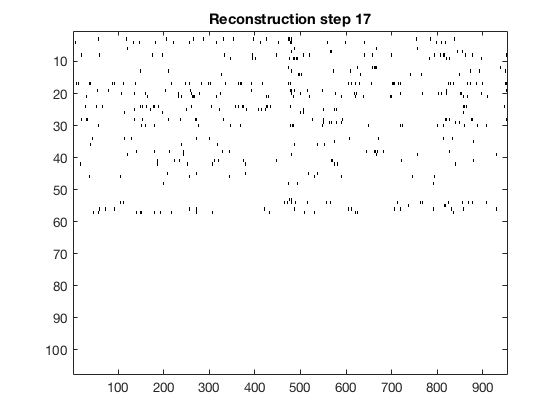

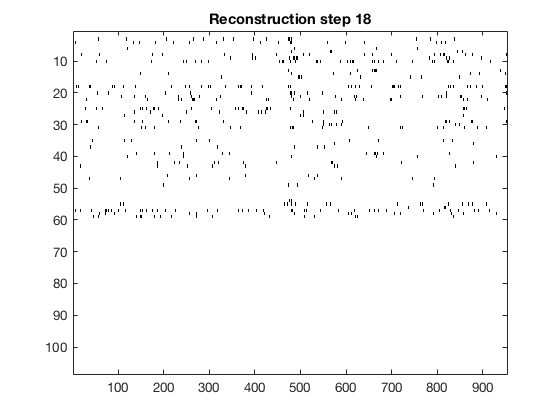

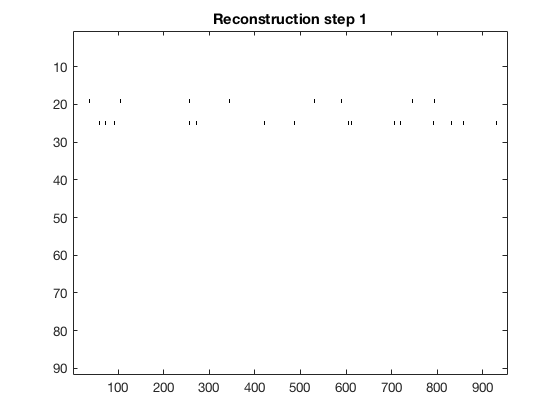

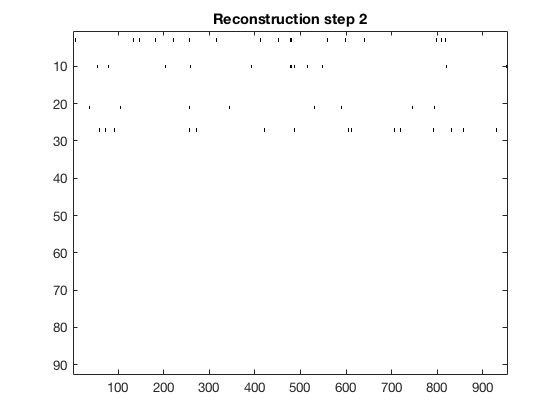

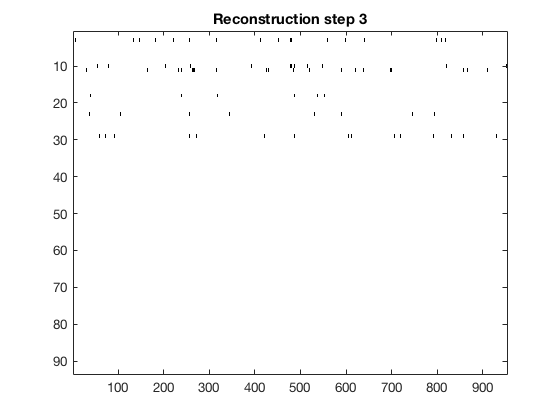

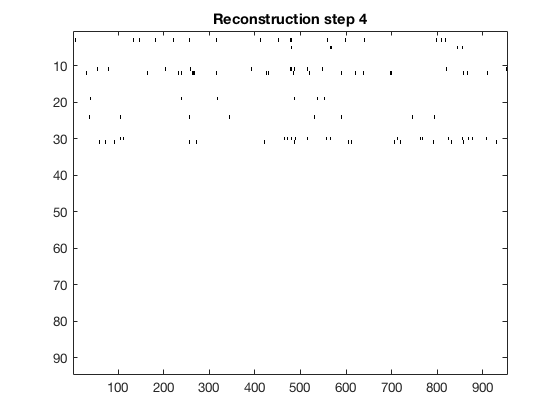

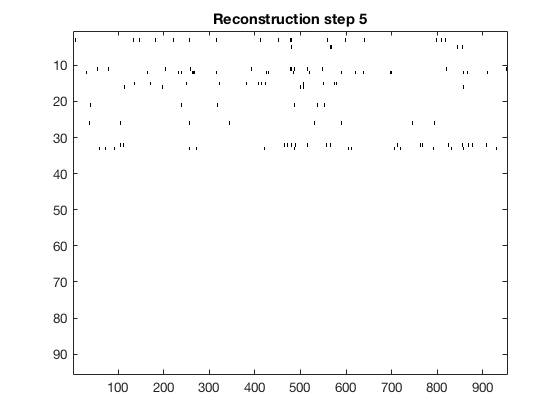

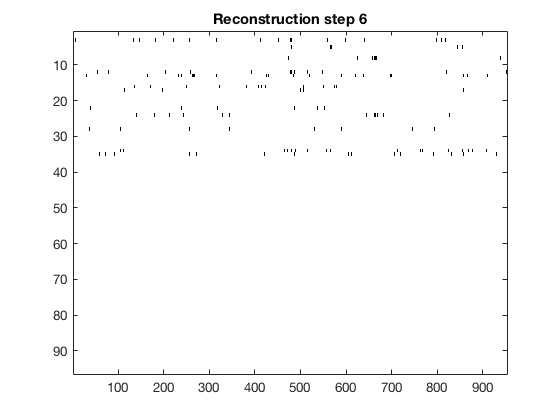

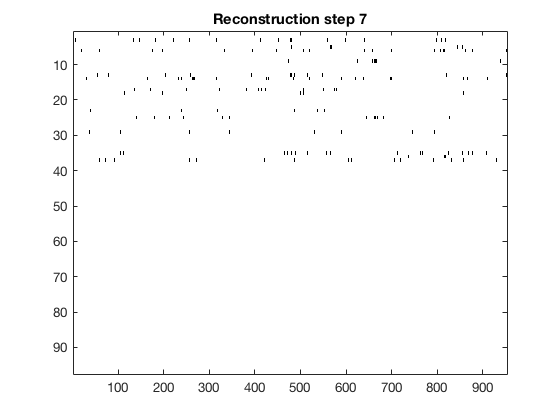

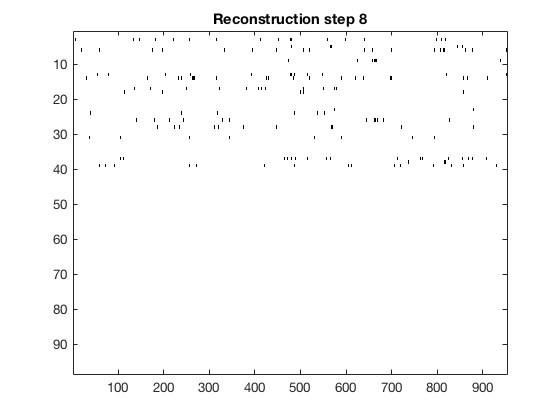

In [7]:


%Reconstructed (different) elements vs data matrix
    %for k=CGevents+1:-1:1
    for k=1:CGevents+1
        figure
        imagesc(cell2mat(R{k}')~=C{k})
        colormap(flipud(gray))
        title(['Reconstruction step ' num2str(CGevents+1-k)])
    end
        
    

## 7b. Sanity check: Are reconstructions cumulative? Which elements replaced?

### The covariance matrices:

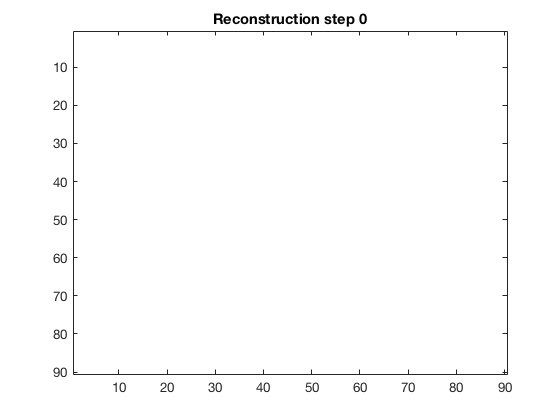

In [8]:

%Reconstructed elements of covariance matrix
    %for k=CGevents+1:-1:1
    for k=1:CGevents+1
        figure
        imagesc(cov_matrix(cell2mat(R{k}'))~=cov_matrix(cell2mat(D{k}')))
        colormap(flipud(gray))
        title(['Reconstruction step ' num2str(CGevents+1-k)])
    end
        

In [9]:
size(R)


ans =

     1    71



In [10]:
MostHi


MostHi =

    22    52
    63    33
    24    88
   113   137
    17    67
   147    49
   117   116
    97    42
    84    19
    83    58
    86   125
    60    25
    22    35
   102    11
     8    88
    10   101
    94   103
   107   124
    28    38
   108    41
    21     1
    33    44
    31   115
    55    88
    81    60
    37    83
    67    56
    49    78
    54   101
    88    50
     9    25
    34    72
    36    18
    55    64
    31    19
    25    78
    38    25
    23    74
    80     5
    31    59
    17    23
    44    54
    22    72
    27    31
    17     6
    27    56
    62    33
     2    21
    46    35
    60    10
    28    56
    34    55
    57    10
     3    17
    18    22
    41    30
    13    25
     8    24
    33    47
    11    22
    28     5
    33    38
    23    28
     6    36
    24     8
    16    15
     5    30
    18    11
     3    10
    25    19

